<a href="https://colab.research.google.com/github/amruthaduvvuri/Supply-chain-delay-_analysis/blob/main/Supply_Chain_Delay_Analysis_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚚 Case Study: Supply Chain Delay Analysis in E-Commerce Logistics
**Tools:** Python, Pandas, Tableau  
**Dataset:** [Olist E-commerce Delivery Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

**Objective:** Identify the root causes of late deliveries and recommend optimizations to reduce delays.

## 🔄 Step 1: Load and Merge Tables
- Merging orders, order_items, order_reviews, order_geolocation, and order_deliveries tables.
- Focusing on delivery dates, order creation, and review scores.

In [ ]:
import pandas as pd

# Load the datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,5


## ⏱ Step 2: Delivery Delay Analysis
- Compute delay: actual_delivery - estimated_delivery
- Flag delayed orders for analysis

In [ ]:
df['delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['is_late'] = df['delay_days'] > 0
df[['order_id', 'delay_days', 'is_late']].head()

,order_id,delay_days,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,-10.0,False


## 📍 Step 3: Clustering by Geography and Seller Performance
- Analyze delays by state/region
- Identify sellers with high delay frequency

<Axes: title={'center': 'Top 10 Sellers by Late Delivery Ratio'}, xlabel='seller_id'>

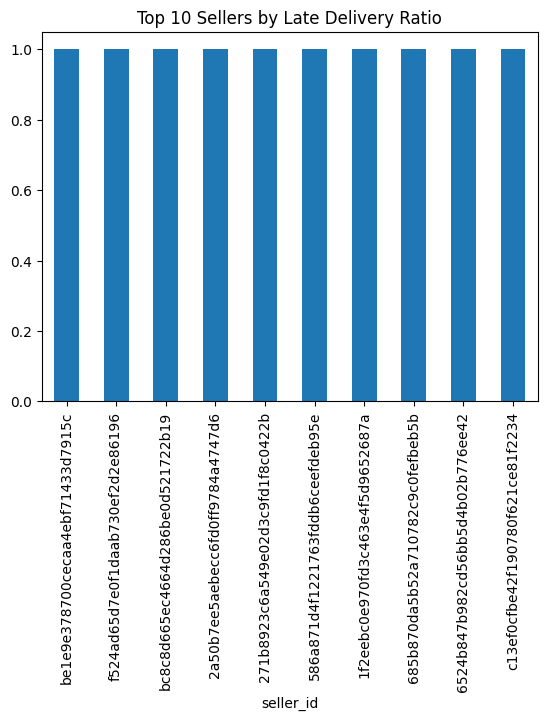

In [ ]:
delay_by_seller = df.groupby('seller_id')['is_late'].mean().sort_values(ascending=False).head(10)
delay_by_seller.plot(kind='bar', title='Top 10 Sellers by Late Delivery Ratio')